# LAB 3 : Associative Networks 

Name : 

Roll Number : 

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


#**Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. 3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
  Please write a program to demonstrate the same

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import torch

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data

#Orthogonal Input data
a1 = np.array([1,1,-1,-1]).reshape(4,1)
a2 = np.array([-1,1,1,-1]).reshape(4,1)
a3 = np.array([-1,1,-1,1]).reshape(4,1)
a4 = np.array([1,1,1,1]).reshape(4,1)

Orthogonal_inp = np.concatenate((a1,a2,a3),axis = 1)
Orthogonal_inp = np.array([[1,1,-1,-1],[-1,1,1,-1],[-1,1,-1,1]])
# Orthonormal Input Vectors
Orthonormal_inp = Orthogonal_inp/2
Orthonormal_inp = ortho_group.rvs(dim=3)

#LI input

a5 = np.array([-1,-1,-1,-1]).reshape(4,1)
a6 = np.array([1,-1,-1,1]).reshape(4,1)
a7 = np.array([-1,-1,1,-1]).reshape(4,1)
LI_inp = np.concatenate((a5,a6,a7),axis = 1)
LI_inp = np.array([[-1,-1,-1],[1,-1,-1],[1,-1,1]])
# Linearly Dependent Vectors

a8 = np.array([1,-1,1,-1]).reshape(4,1)
a9 = np.array([-1,1,-1,1]).reshape(4,1)
a10 = np.array([1,1,-1,1]).reshape(4,1)
LD_inp = np.concatenate((a8,a9,a10),axis = 1)
LD_inp = np.array([[1,-1,-1],[-1,1,-1],[0,0,-2]])


# Output vectors
b_LI = np.array([1,2,1])* LI_inp
b_LD = np.array([1,2,1])*LD_inp
b_orthogonal = np.array([1,2,1])*Orthonormal_inp

In [ ]:
def weights_by_computation(A,B):

  ## Here A is input and B is output
  A_inv = np.linalg.pinv(A)
  weights = np.dot(B,A_inv) ## Write the weight equation here
  b_est = np.dot(weights,A)
  error = (np.square(np.linalg.norm(B - b_est)))*(1/A.shape[1])## Mean Squared Error
  
  return weights,error


In [ ]:
# for linearly independent data
w_LI, err_LI = weights_by_computation(LI_inp, b_LI)
print("Weights by computation for LI data \n")
print("Weights: ", w_LI)
print('\n Error:', np.round(err_LI))

Weights by computation for LI data 

Weights:  [[ 1.50000000e+00  2.77555756e-16  5.00000000e-01]
 [ 5.00000000e-01  1.00000000e+00  5.00000000e-01]
 [ 5.00000000e-01 -1.66533454e-16  1.50000000e+00]]

 Error: 0.0


In [ ]:
# for linearly dependent data
w_LD, err_LD = weights_by_computation(LD_inp, b_LD)
print("Weights by computation for LD data \n")
print("Weights: ", w_LD)
print('\n Error:', np.round((err_LD), 6))

Weights by computation for LD data 

Weights:  [[ 0.91666667 -0.58333333  0.33333333]
 [-0.58333333  0.91666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]

 Error: 0.333333


In [ ]:
# for Orthonormal data
w_orth, err_orth = weights_by_computation(Orthonormal_inp, b_orthogonal)
print("Weights by computation for orthonormal data \n")
print("Weights: ", w_orth)
print('\n Error:', np.round(err_orth))

Weights by computation for orthonormal data 

Weights:  [[ 1.54417319  0.05569365 -0.49492115]
 [ 0.05569365  1.00569999 -0.05065292]
 [-0.49492115 -0.05065292  1.45012682]]

 Error: 0.0


In [ ]:
def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights_init = (np.zeros((B.shape[0],A.shape[0]))) ## Initialise weights here
  error = []
  weights = weights_init
  for epoch in range(num_epochs):
    ## Write the widrow learning training loop here
        #calculating the output value
        b_est = np.dot(weights,A)           
        #calculating the error
        err = B - b_est

        weightChange = learning_rate*err
        weights += np.dot(weightChange,A.T)
        cost  = np.sum(np.square(err))/A.shape[0]
        error.append(cost)

  return weights,error



 ### Weights for LI data through widro learning law
 [[1.50000000e+00 3.16556265e-16 5.00000000e-01]
 [5.00000000e-01 1.00000000e+00 5.00000000e-01]
 [5.00000000e-01 2.50468497e-16 1.50000000e+00]]

 Error computed
 0.0


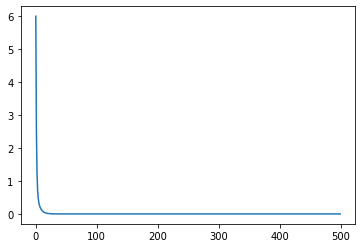

In [ ]:
# for LI data 
x = np.arange(500)
w_LI, err_LI = weights_by_widrow(LI_inp, b_LI, 500, 0.1)
print("\n ### Weights for LI data through widro learning law\n", w_LI)
print("\n Error computed\n", np.round(err_LI[-1],7))
plt.figure()
plt.plot(x,err_LI)
plt.show()


 ### Weights for LD data through widro learning law
 [[ 0.91666667 -0.58333333  0.33333333]
 [-0.58333333  0.91666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]

 Error computed
 0.3333333


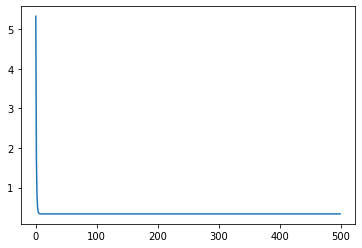

In [ ]:
# for LD data 
x = np.arange(500)
w_LD, err_LD = weights_by_widrow(LD_inp, b_LD, 500, 0.1)
print("\n ### Weights for LD data through widro learning law\n", w_LD)
print("\n Error computed\n", np.round(err_LD[-1],7))
plt.figure()
plt.plot(x,err_LD)
plt.show()


 ### Weights for orthonormal data through widro learning law
 [[ 1.54417319  0.05569365 -0.49492115]
 [ 0.05569365  1.00569999 -0.05065292]
 [-0.49492115 -0.05065292  1.45012682]]

 Error computed
 0.0


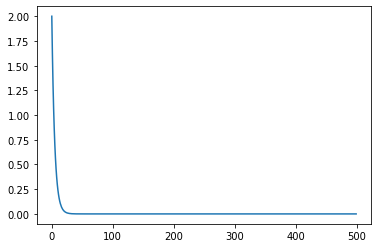

In [ ]:
# for orthonormal data 
x = np.arange(500)
w_orth, err_orth = weights_by_widrow(Orthonormal_inp, b_orthogonal, 500, 0.1)
print("\n ### Weights for orthonormal data through widro learning law\n", w_orth)
print("\n Error computed\n", np.round(err_orth[-1],7))
plt.figure()
plt.plot(x,err_orth)
plt.show()

In [ ]:
def weights_by_hebbian(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights_init = (np.zeros((B.shape[0],A.shape[0])))## Initialise weights here
  weights = weights_init
  error =[]
  for i in range(A.shape[1]):

    ## Write the widrow learning training loop here
    input=np.matrix(A[:,i]).T
    d_op=np.matrix(B[:,i]).T

    del_weights = learning_rate*(d_op@input.T)
    weights = weights+del_weights

    err= B-weights@A
    error.append((np.square(np.linalg.norm(err)))*1/A.shape[1])

  return weights,error


 ### Weights for LI data through hebbian learning law
 [[4. 2. 0.]
 [2. 4. 2.]
 [0. 2. 4.]]

 Error computed
 46.0


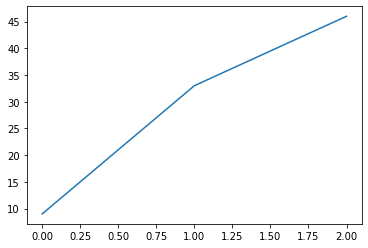

In [ ]:
# for LI data 
x = np.arange(3)
w_LI, err_LI = weights_by_hebbian(LI_inp, b_LI, 500, 1)
print("\n ### Weights for LI data through hebbian learning law\n", w_LI)
print("\n Error computed\n", np.round(err_LI[-1],5))
plt.figure()
plt.plot(x,err_LI)
plt.show()


 ### Weights for LD data through hebbian learning law
 [[ 4. -2.  2.]
 [-2.  4.  2.]
 [ 2.  2.  4.]]

 Error computed
 77.33333


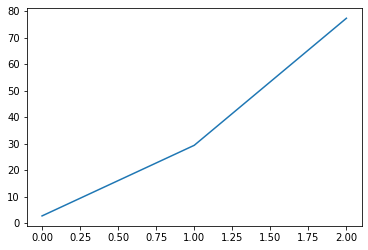

In [ ]:
# for LD data 
x = np.arange(3)
w_LD, err_LD = weights_by_hebbian(LD_inp, b_LD, 500, 1)
print("\n ### Weights for LD data through hebbian learning law\n", w_LD)
print("\n Error computed\n", np.round(err_LD[-1],5))
plt.figure()
plt.plot(x,err_LD)
plt.show()


 ### Weights for LI data through hebbian learning law
 [[ 1.54417319  0.05569365 -0.49492115]
 [ 0.05569365  1.00569999 -0.05065292]
 [-0.49492115 -0.05065292  1.45012682]]

 Error computed
 0.0


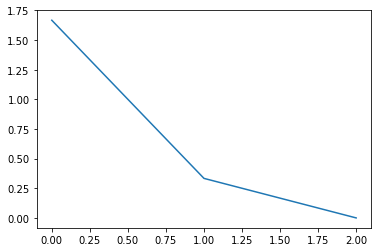

In [ ]:
# for orthonormal data 
x = np.arange(3)
w_orth, err_orth = weights_by_hebbian(Orthonormal_inp, b_orthogonal, 500, 1)
print("\n ### Weights for LI data through hebbian learning law\n", w_orth)
print("\n Error computed\n", np.round(err_orth[-1],5))
plt.figure()
plt.plot(x,err_orth)
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

# **Problem 2** : Demonstrate the working principle of two layer associative network performing heteroassociation task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data

inp1 = np.array([[1,1,0,0],[0,1,1,0],[0,1,0,1],[1,0,0,0]])
desired_op = np.array([[1,0],[1,1],[1,1],[1,0]])
print("input for M>L case \n", inp1)
print("\n desired output\n",desired_op)
print("Input shape:", inp1.shape, "\nOutput shape: ", desired_op.shape)

input for M>L case 
 [[1 1 0 0]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 0 0]]

 desired output
 [[1 0]
 [1 1]
 [1 1]
 [1 0]]
Input shape: (4, 4) 
Output shape:  (4, 2)


In [ ]:
## You can use the same function defined above for computation method and widrow's learning law

# weights by computation
weights, error = weights_by_computation(inp1, desired_op.T)
print("weights by computation for L<M \n", weights)
print("\n error computed \n", error)

weights by computation for L<M 
 [[-1.00000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+00]
 [-2.22044605e-16  1.00000000e+00 -2.53304001e-16 -4.44089210e-16]]

 error computed 
 6.385012872854573e-31



 ### Weights for L<M through widro learning law
 [[-9.98598014e-01  9.99509933e-01  9.99509933e-01  1.99837131e+00]
 [ 1.21831140e-04  9.99957414e-01 -4.25863014e-05 -1.41531496e-04]]

 Error computed
 2e-07


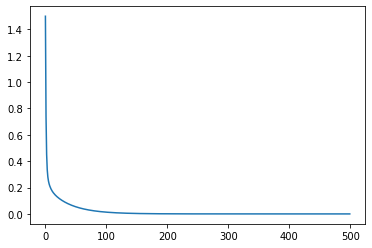

In [ ]:
#weights by widrow learning
x = np.arange(500)
weight_3, error_3 = weights_by_widrow(inp1, desired_op.T,500,0.1)
print("\n ### Weights for L<M through widro learning law\n", weight_3)
print("\n Error computed\n", np.round(error_3[-1],7))
plt.figure()
plt.plot(x,error_3)
plt.show()

In [ ]:
# input for case where L>M
inp2 = np.array([[1,1,0,0],[0,1,1,0],[0,1,0,1],[1,0,0,0],[0,0,0,1]]).T
inp2_bias = np.concatenate((inp2, np.array([-1,-1,-1,-1,-1]).reshape(1,5)),axis=0)
desired_op_2 = np.array([[1,0],[1,1],[1,1],[1,0],[0,1]])
print("input for M<L case \n", inp2)
print("\n desired output\n",desired_op_2)
print("Input shape:", inp2.shape, "\nOutput shape: ", desired_op_2.shape)

input for M<L case 
 [[1 0 0 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 1]]

 desired output
 [[1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]]
Input shape: (4, 5) 
Output shape:  (5, 2)


## Inferences and Conclusion : State all the key observations and conclusion